# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [303]:
m = 3
A = 0.1#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [304]:
(0.12872627258300784+0.12872634887695314)/2

0.12872631072998048

In [305]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [306]:
global compactified=true
global loggrid=false
global bisection=false
global meshrefinement=false;

In [307]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=1000.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [308]:
print(N)

1600.0

In [309]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [310]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [311]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.000625
the time step is 0.0003125


# Initial data of m β Ψ and Ψ,x

In [312]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)

#PSI
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,3] = initpsi
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [313]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [314]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [315]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

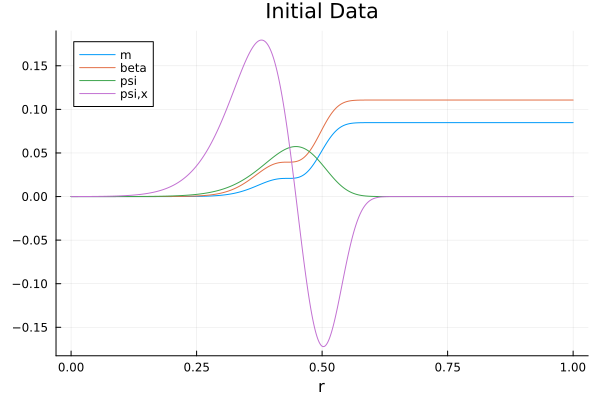

In [316]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [317]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [318]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [319]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0025023457046522


In [320]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [321]:
finaltime=1.0
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 20 dt is 0.0003125, t=0.006250000000000001 speed is 0.4993751953125001, dx/dt=2.0


iteration 40 dt is 0.0003125, t=0.012500000000000006 speed is 0.4993751953125, dx/dt=2.0


iteration 60 dt is 0.0003125, t=0.01875000000000001 speed is 0.4993751953125, dx/dt=2.0


iteration 80 dt is 0.0003125, t=0.025000000000000015 speed is 0.4993751953125001, dx/dt=2.0


iteration 100 dt is 0.0003125, t=0.03125000000000002 speed is 0.4993751953125, dx/dt=2.0


iteration 120 dt is 0.0003125, t=0.037500000000000026 speed is 0.4993751953125, dx/dt=2.0


iteration 140 dt is 0.0003125, t=0.04375000000000003 speed is 0.4993751953125, dx/dt=2.0


iteration 160 dt is 0.0003125, t=0.05000000000000004 speed is 0.4993751953125, dx/dt=2.0


iteration 180 dt is 0.0003125, t=0.05625000000000004 speed is 0.4993751953125001, dx/dt=2.0


iteration 200 dt is 0.0003125, t=0.06250000000000004 speed is 0.4993751953125, dx/dt=2.0


iteration 220 dt is 0.0003125, t=0.06874999999999991 speed is 0.499375195312500



iteration 1780 dt is 0.0003125, t=0.5562499999999995 speed is 0.4993751953099004, dx/dt=2.0


iteration 1800 dt is 0.0003125, t=0.5625000000000004 speed is 0.4993751953094408, dx/dt=2.0


iteration 1820 dt is 0.0003125, t=0.5687500000000014 speed is 0.49937519530892177, dx/dt=2.0


iteration 1840 dt is 0.0003125, t=0.5750000000000024 speed is 0.49937519530834135, dx/dt=2.0


iteration 1860 dt is 0.0003125, t=0.5812500000000034 speed is 0.4993751953076991, dx/dt=2.0


iteration 1880 dt is 0.0003125, t=0.5875000000000044 speed is 0.49937519530699687, dx/dt=2.0


iteration 1900 dt is 0.0003125, t=0.5937500000000053 speed is 0.49937519530623947, dx/dt=2.0


iteration 1920 dt is 0.0003125, t=0.6000000000000063 speed is 0.4993751953054351, dx/dt=2.0


iteration 1940 dt is 0.0003125, t=0.6062500000000073 speed is 0.49937519530459573, dx/dt=2.0


iteration 1960 dt is 0.0003125, t=0.6125000000000083 speed is 0.49937519530373836, dx/dt=2.0


iteration 1980 dt is 0.0003125, t=0.6187500000000092



iteration 3520 dt is 0.0003125, t=1.100000000000049 speed is 0.49937519531249924, dx/dt=2.0


iteration 3540 dt is 0.0003125, t=1.1062500000000477 speed is 0.4993751953124994, dx/dt=2.0


iteration 3560 dt is 0.0003125, t=1.1125000000000465 speed is 0.49937519531249946, dx/dt=2.0


iteration 3580 dt is 0.0003125, t=1.1187500000000452 speed is 0.4993751953124997, dx/dt=2.0


iteration 3600 dt is 0.0003125, t=1.125000000000044 speed is 0.49937519531249985, dx/dt=2.0


iteration 3620 dt is 0.0003125, t=1.1312500000000427 speed is 0.49937519531249985, dx/dt=2.0


iteration 3640 dt is 0.0003125, t=1.1375000000000415 speed is 0.49937519531249985, dx/dt=2.0


iteration 3660 dt is 0.0003125, t=1.1437500000000402 speed is 0.4993751953124999, dx/dt=2.0


iteration 3680 dt is 0.0003125, t=1.150000000000039 speed is 0.4993751953125, dx/dt=2.0


iteration 3700 dt is 0.0003125, t=1.1562500000000377 speed is 0.4993751953125, dx/dt=2.0


iteration 3720 dt is 0.0003125, t=1.1625000000000365 speed is 



iteration 5320 dt is 0.0003125, t=1.662499999999937 speed is 0.4993751953125, dx/dt=2.0


iteration 5340 dt is 0.0003125, t=1.6687499999999358 speed is 0.4993751953125, dx/dt=2.0


iteration 5360 dt is 0.0003125, t=1.6749999999999345 speed is 0.4993751953125001, dx/dt=2.0


iteration 5380 dt is 0.0003125, t=1.6812499999999333 speed is 0.4993751953125001, dx/dt=2.0


iteration 5400 dt is 0.0003125, t=1.687499999999932 speed is 0.4993751953125001, dx/dt=2.0


iteration 5420 dt is 0.0003125, t=1.6937499999999308 speed is 0.4993751953125, dx/dt=2.0


iteration 5440 dt is 0.0003125, t=1.6999999999999296 speed is 0.4993751953125, dx/dt=2.0


iteration 5460 dt is 0.0003125, t=1.7062499999999283 speed is 0.4993751953124999, dx/dt=2.0


iteration 5480 dt is 0.0003125, t=1.712499999999927 speed is 0.4993751953125001, dx/dt=2.0


iteration 5500 dt is 0.0003125, t=1.7187499999999258 speed is 0.4993751953125001, dx/dt=2.0


iteration 5520 dt is 0.0003125, t=1.7249999999999246 speed is 0.499375195

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [749]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

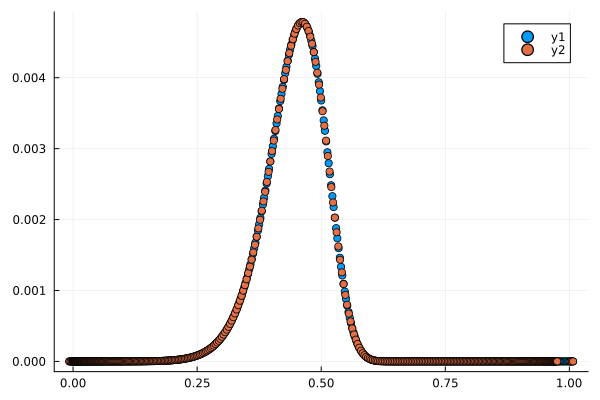

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

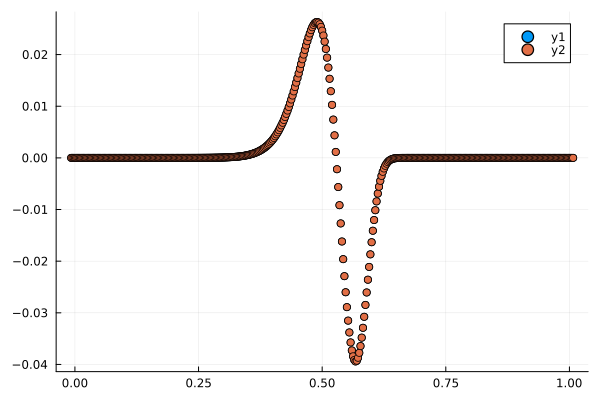

In [417]:
scatter([x1,x1],[y1,y2])